In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mind = pd.read_csv('raw_mindwave.csv').set_index('time').drop(columns=['raw', 'attention', 'meditation'])
muse = pd.read_csv('raw_muse.csv').set_index('time').drop(columns=['raw'])

mind.index = pd.to_datetime(mind.index)
muse.index = pd.to_datetime(muse.index)

mind_df = mind.groupby([mind.index.minute, mind.index.second, mind.index.microsecond//1e5]).mean()
muse_df = muse.groupby([muse.index.minute, muse.index.second, muse.index.microsecond//1e5]).mean() ** 2 # <<============ เพิ่งเพิมใน muse

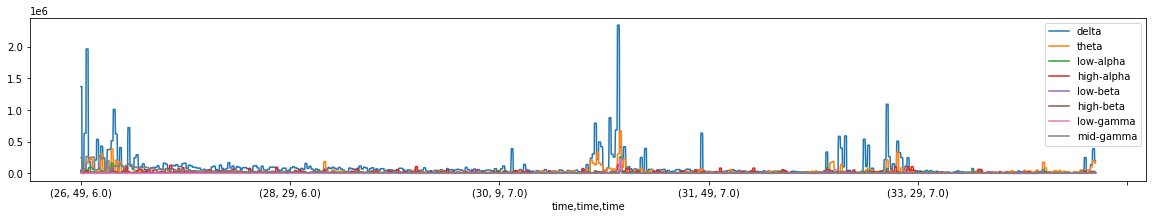

In [3]:
mind_df.plot(figsize=(20, 3))

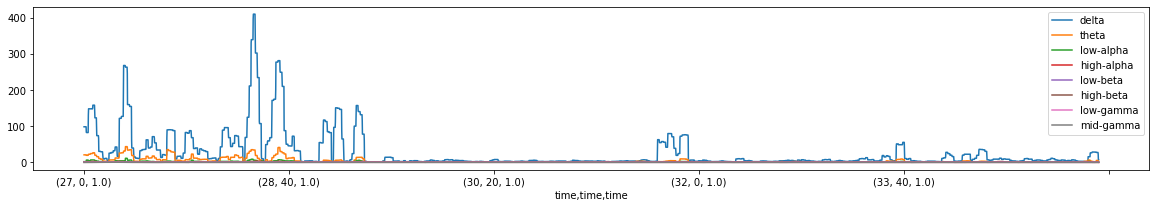

In [4]:
muse_df.plot(figsize=(20, 3))

In [5]:
from scipy.optimize import fmin, minimize
from scipy.stats import normaltest

def _func(c, array): 
    return np.abs(np.std(array ** (1/c)) - 1)

def _calculate_c(array):
    res = fmin(_func, 1, args=(array,), disp=0)
    return res[0]

def get_c_array(df):
    return np.array([_calculate_c(df[col]) for col in df.columns])

def normalize(df):
    return df ** (1/get_c_array(df))

mind_c = get_c_array(mind_df)

# print(get_c_array(mind_df))
# print(get_c_array(muse_df))

mind_n = normalize(mind_df)
muse_n = normalize(muse_df)

# print(mind_n.mean())
# print(muse_n.mean())

muse_df = (muse_n - muse_n.mean() + mind_n.mean()) ** mind_c

[6.22949219 5.60664063 5.10400391 5.58320313 4.77851563 4.32861328
 4.13066406 6.01787109]
[3.34765625 2.18398438 1.18662109 0.61787109 0.20209961 1.23632813
 1.72353516 2.26328125]
delta         5.782872
theta         5.908993
low-alpha     5.842178
high-alpha    5.449491
low-beta      6.226439
high-beta     7.679877
low-gamma     6.415543
mid-gamma     4.476359
dtype: float64
delta         2.108653
theta         1.616526
low-alpha     1.166655
high-alpha    1.045655
low-beta      0.109606
high-beta     0.276243
low-gamma     0.269904
mid-gamma     0.306473
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299F6550668>,
      dtype=object)

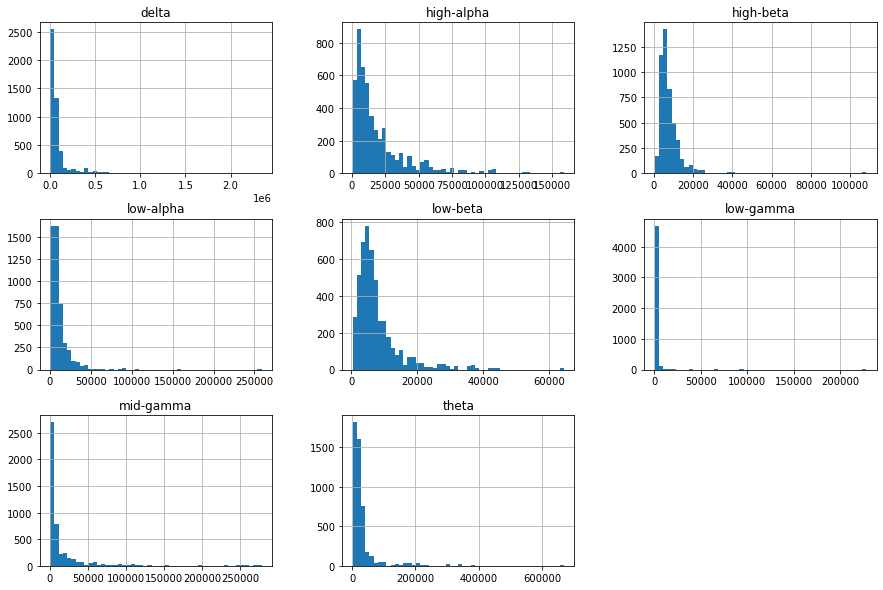

In [6]:
mind_df.hist(bins=50, figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299F78F4588>,
      dtype=object)

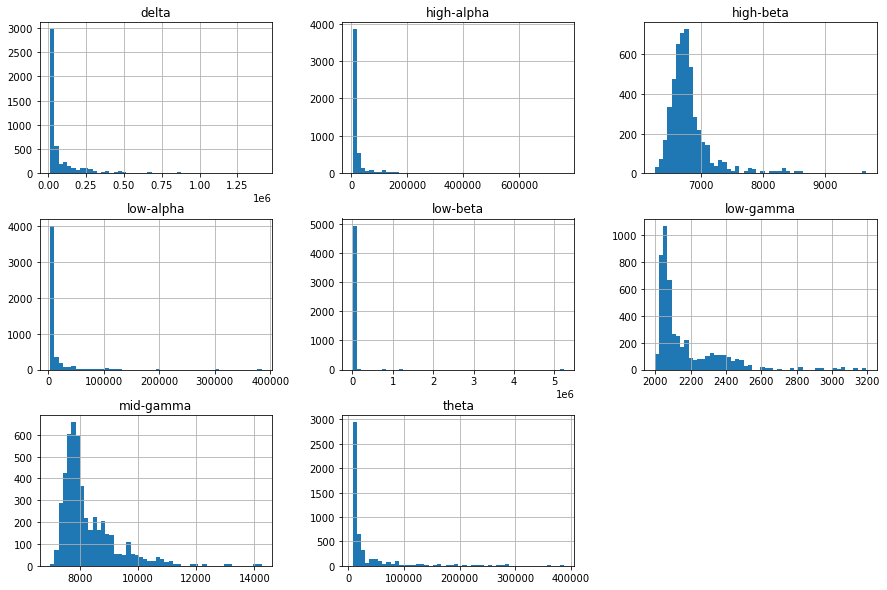

In [7]:
muse_df.hist(bins=50, figsize=(15, 10))

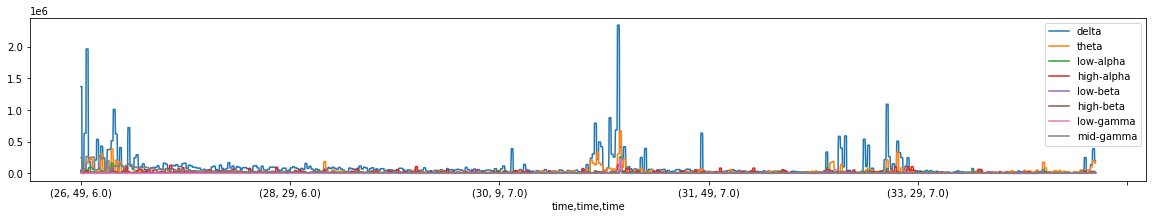

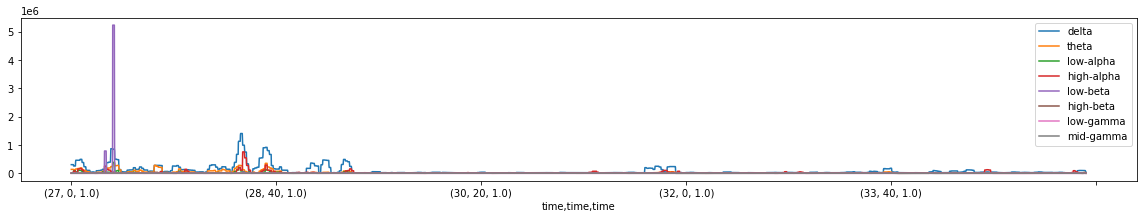

In [8]:
mind_df.plot(figsize=(20, 3))
muse_df.plot(figsize=(20, 3))